In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import math

In [2]:
# Load Data from pickle file
myFile = open('Comparison_Opt_March_9_grad_1e5.p', 'rb')
results = pkl.load(myFile)
# myFile.close()
# myFile2 = open('Comparison_Opt_May_25_4.p', 'rb')
#results2 = pkl.load(myFile2)
myFile.close()

In [3]:
Evals = results["Evals"]
# Evals2 = results2["Evals"]
function_budget = results["function_budget"]

In [4]:
print(Evals.shape)

(5, 22, 5)


In [5]:
Evals3 = np.concatenate((Evals, Evals2),axis=1)

NameError: name 'Evals2' is not defined

In [6]:
# average over trials
Averaged_Evals = np.mean(Evals, axis=2)
# Modify to assign nan to any entries = function_budget, as these
# correspond to problems that have not been solved
for i in range(Averaged_Evals.shape[0]):
    for j in range(Averaged_Evals.shape[1]):
        if Averaged_Evals[i,j] >= function_budget:
            Averaged_Evals[i,j] = np.inf
            
print(Averaged_Evals)

[[4.81200e+02 3.72800e+02 2.52400e+02 2.68000e+02 2.88400e+02         inf
          inf         inf 7.93600e+02         inf         inf 7.06800e+02
          inf 4.45240e+03 1.82920e+04         inf         inf 8.60000e+01
          inf 9.51432e+04 5.88000e+01 9.76000e+01]
 [1.09736e+04 1.04236e+04 6.47440e+03 6.30600e+03 3.45160e+03 7.59640e+03
  6.19384e+04 9.26144e+04 2.34048e+04 9.31240e+03 7.74360e+03 3.42508e+04
          inf 3.19200e+04         inf         inf 5.60460e+04 1.16400e+02
  2.99200e+02 2.47600e+02 1.92840e+03 3.36800e+02]
 [9.50000e+02 7.08000e+02 5.92000e+02 5.18000e+02 6.02000e+02         inf
          inf         inf 1.68040e+04         inf         inf 1.24400e+03
          inf         inf 4.49240e+04         inf         inf 4.48000e+02
          inf 9.15960e+04 1.52000e+02 2.62000e+02]
 [5.14000e+03 6.07600e+03 3.48400e+03 2.72800e+03 4.18240e+04         inf
          inf         inf 6.89500e+03         inf         inf 7.05700e+03
          inf 1.70110e+04        

In [7]:
min_Evals = np.min(Averaged_Evals,axis=0)
print(min_Evals)

[4.81200e+02 3.72800e+02 2.52400e+02 2.68000e+02 2.88400e+02 7.59640e+03
 6.19384e+04 9.26144e+04 7.93600e+02 9.31240e+03 7.74360e+03 7.06800e+02
         inf 4.45240e+03 1.82920e+04         inf 5.60460e+04 8.60000e+01
 2.99200e+02 2.47600e+02 5.88000e+01 9.76000e+01]


In [8]:
normalized_Evals = Averaged_Evals/min_Evals
print(normalized_Evals)

[[  1.           1.           1.           1.           1.
           inf          inf          inf   1.                  inf
           inf   1.                  nan   1.           1.
           nan          inf   1.                  inf 384.26171244
    1.           1.        ]
 [ 22.80465503  27.96030043  25.65134707  23.52985075  11.96809986
    1.           1.           1.          29.49193548   1.
    1.          48.45897001          nan   7.16916719          inf
           nan   1.           1.35348837   1.           1.
   32.79591837   3.45081967]
 [  1.97423109   1.89914163   2.34548336   1.93283582   2.08737864
           inf          inf          inf  21.17439516          inf
           inf   1.76004527          nan          inf   2.45593702
           nan          inf   5.20930233          inf 369.93537964
    2.58503401   2.68442623]
 [ 10.68162926  16.29828326  13.80348653  10.17910448 145.02080444
           inf          inf          inf   8.68825605          inf
       

<ipython-input-8-2db62c6f062b>:1: RuntimeWarning: invalid value encountered in true_divide
  normalized_Evals = Averaged_Evals/min_Evals


In [9]:
tau_vals = np.exp2(np.arange(0,12,0.01))
num_tau_vals = len(tau_vals)

In [10]:
for i in range(normalized_Evals.shape[0]):
    for j in range(normalized_Evals.shape[1]):
        if math.isnan(normalized_Evals[i,j]):
            normalized_Evals[i,j] = np.inf
     
print(normalized_Evals)

[[  1.           1.           1.           1.           1.
           inf          inf          inf   1.                  inf
           inf   1.                  inf   1.           1.
           inf          inf   1.                  inf 384.26171244
    1.           1.        ]
 [ 22.80465503  27.96030043  25.65134707  23.52985075  11.96809986
    1.           1.           1.          29.49193548   1.
    1.          48.45897001          inf   7.16916719          inf
           inf   1.           1.35348837   1.           1.
   32.79591837   3.45081967]
 [  1.97423109   1.89914163   2.34548336   1.93283582   2.08737864
           inf          inf          inf  21.17439516          inf
           inf   1.76004527          inf          inf   2.45593702
           inf          inf   5.20930233          inf 369.93537964
    2.58503401   2.68442623]
 [ 10.68162926  16.29828326  13.80348653  10.17910448 145.02080444
           inf          inf          inf   8.68825605          inf
       

In [11]:
NumProbs = normalized_Evals.shape[1]
rho_vals = np.zeros((5,num_tau_vals))

for j in range(num_tau_vals):
    for i in range(5):
        rho_vals[i,j] = np.count_nonzero(normalized_Evals[i,:]<=tau_vals[j])/NumProbs

print(rho_vals)

[[0.54545455 0.54545455 0.54545455 ... 0.59090909 0.59090909 0.59090909]
 [0.36363636 0.36363636 0.36363636 ... 0.86363636 0.86363636 0.86363636]
 [0.         0.         0.         ... 0.54545455 0.54545455 0.54545455]
 [0.         0.         0.         ... 0.59090909 0.59090909 0.59090909]
 [0.         0.         0.         ... 0.59090909 0.59090909 0.59090909]]


In [12]:
print(NumProbs)

22


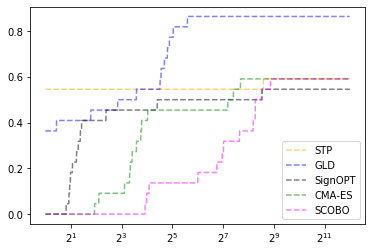

In [13]:
# Plotting

plt.semilogx(tau_vals, rho_vals[0,:], label="STP",
             color = 'orange', alpha=0.5, linestyle= '--',basex=2)
plt.semilogx(tau_vals, rho_vals[1,:], label="GLD",
             color = 'blue', alpha=0.5, linestyle= '--',basex=2)
plt.semilogx(tau_vals, rho_vals[2,:], label="SignOPT",
             color = 'black', alpha=0.5, linestyle= '--',basex=2)
plt.semilogx(tau_vals, rho_vals[3,:], label="CMA-ES",
             color = 'green', alpha=0.5, linestyle= '--',basex=2)
plt.semilogx(tau_vals, rho_vals[4,:], label="SCOBO",
             color = 'magenta', alpha=0.5, linestyle= '--',basex=2)
plt.legend()
plt.show()
# plt.savefig('PerformanceProfile_func_1e5.pdf')


In [ ]:
print(function_budget)